In [1]:
import this


The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
import numpy as np

# 1 test de personalité 

## Importer le fichier resultats dans un df 

In [3]:
df = pd.read_csv("data/enquete.csv.csv")
df

,Unnamed: 0,Bou,Jog,Roc,Bio,Equi
0,Lara,0,10,2,3,6
1,Eric,8,4,2,2,2
2,Harald,0,3,10,0,0
3,Flora,2,3,1,9,4


In [4]:
df.columns

Index(['Unnamed: 0', 'Bou', 'Jog', 'Roc', 'Bio', 'Equi'], dtype='object')

## 1.1. Si on appelle X la matrice des r ́esultats, que repr ́esente X(3, 2) ?

X (3,2) = 3

## 1.2. Calculez la matrice des distances Euclidiennes des réponses des différents participants.

In [5]:
df.columns =  ['Nom', 'Bou', 'Jog', 'Roc', 'Bio', 'Equi']
[df['Nom']]


[0      Lara
 1      Eric
 2    Harald
 3     Flora
 Name: Nom, dtype: object]

In [6]:
df.rename(index = {0:'Lara',
 1: 'Eric',
 2 :   'Harald',
 3 :    'Flora'}, inplace = True)


In [7]:
df = df.drop('Nom',axis=1)
df

,Bou,Jog,Roc,Bio,Equi
Lara,0,10,2,3,6
Eric,8,4,2,2,2
Harald,0,3,10,0,0
Flora,2,3,1,9,4


In [8]:
distances= distance_matrix (df,df)
distances

array([[ 0.        , 10.81665383, 12.56980509,  9.69535971],
       [10.81665383,  0.        , 11.70469991,  9.53939201],
       [12.56980509, 11.70469991,  0.        , 13.49073756],
       [ 9.69535971,  9.53939201, 13.49073756,  0.        ]])

- les reponses les plus proches sont celle d' ERIC et Flora pour 9,53
- les reponses les plus éloignées sont celles d'Harald et flora pour 13,49

## 1.3. Calculez la norme du vecteur des r ́eponses de Harald. Ce calcul sera fait manuellement, avec une calculatrice.
on le fera ici sur python  on utilisera la fonction linalg_norm de numpy

In [9]:
# recuperons les reponses d'HArald
# recuprons juste la ligne d'harald
df.index
harald = df.loc['Harald', :]
harald = harald.values

norm_harald = np.linalg.norm(harald)
norm_harald

10.44030650891055

norme des reponses d'harald est de 10,44

#  2- Spectres visible - proche infrarouge de farines de blé

##### importons les données neccessaires pour cet exercice

In [10]:
# importation des données 
spectres_farines = pd.read_csv("data/x_140farines.csv.csv")
infos_farines = pd.read_csv("data/y_140farines.csv.csv")


In [11]:
spectres_farines

,code,400,404,408,412,416,420,424,428,432,...,2460,2464,2468,2472,2476,2480,2484,2488,2492,2496
0,3T1A1,0.2195,0.2254,0.2296,0.2326,0.2342,0.2354,0.2348,0.2337,0.2320,...,0.5378,0.5439,0.5496,0.5548,0.5591,0.5625,0.5650,0.5665,0.5672,0.5672
1,3T1A2,0.2166,0.2222,0.2262,0.2290,0.2308,0.2316,0.2309,0.2299,0.2282,...,0.5290,0.5351,0.5408,0.5459,0.5502,0.5536,0.5561,0.5577,0.5583,0.5583
2,3T1H1,0.2261,0.2327,0.2369,0.2398,0.2414,0.2418,0.2410,0.2395,0.2374,...,0.5507,0.5567,0.5623,0.5673,0.5715,0.5748,0.5771,0.5786,0.5793,0.5792
3,3T1H2,0.2314,0.2377,0.2417,0.2444,0.2458,0.2461,0.2451,0.2433,0.2408,...,0.5468,0.5527,0.5582,0.5632,0.5673,0.5705,0.5728,0.5742,0.5749,0.5749
4,3T2A1,0.2378,0.2438,0.2480,0.2507,0.2519,0.2523,0.2509,0.2493,0.2470,...,0.5838,0.5904,0.5965,0.6020,0.6067,0.6104,0.6129,0.6146,0.6153,0.6153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,4D8A2,0.3360,0.3466,0.3551,0.3604,0.3637,0.3642,0.3633,0.3612,0.3587,...,0.7363,0.7430,0.7493,0.7550,0.7598,0.7636,0.7662,0.7679,0.7687,0.7689
136,4D9A1,0.3002,0.3106,0.3190,0.3243,0.3278,0.3294,0.3289,0.3278,0.3266,...,0.6854,0.6925,0.6990,0.7048,0.7098,0.7137,0.7165,0.7181,0.7189,0.7189
137,4D9A2,0.3531,0.3650,0.3746,0.3808,0.3847,0.3862,0.3859,0.3847,0.3828,...,0.7457,0.7526,0.7589,0.7646,0.7694,0.7732,0.7758,0.7775,0.7784,0.7784
138,4DXA1,0.3051,0.3152,0.3224,0.3268,0.3291,0.3292,0.3275,0.3247,0.3219,...,0.6950,0.7020,0.7084,0.7142,0.7191,0.7229,0.7256,0.7273,0.7282,0.7282


In [12]:
infos_farines

,code,PROTREF,dur/tendre
0,3T1A1,8.9,T
1,3T1A2,8.7,T
2,3T1H1,11.6,T
3,3T1H2,12.7,T
4,3T2A1,9.1,T
...,...,...,...
135,4D8A2,11.7,D
136,4D9A1,9.9,D
137,4D9A2,12.1,D
138,4DXA1,9.8,D


### 2-1 Dessinez la courbe du spectre moyen, puis dessinez la courbe des  ́ecart-types `a toutes les longueurs d’onde. Que peut-on conclure de ces deux courbes ?


In [13]:
spectres_moyens =  spectres_farines.copy()
spectres_moyens= spectres_moyens.drop(spectres_moyens.columns[0], axis=1)
spectres_moyens= np.mean(spectres_moyens,axis=0)
spectres_moyens

400     0.304078
404     0.313253
408     0.319940
412     0.323846
416     0.325559
          ...   
2480    0.704823
2484    0.707391
2488    0.709027
2492    0.709819
2496    0.709826
Length: 525, dtype: float64

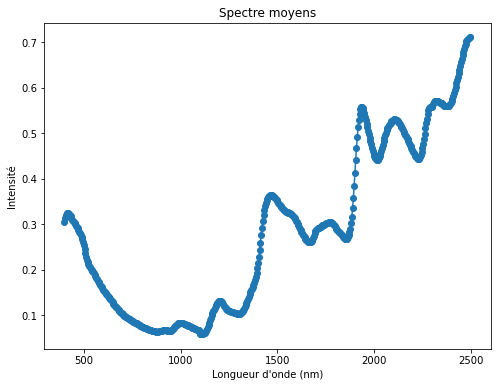

In [14]:
#spectres moyens en fonction des longueurs d'ondes
plt.figure(figsize=(8, 6))
plt.plot( np.array(spectres_moyens.index, dtype=float), spectres_moyens.values, marker='o', linestyle='-')
plt.xlabel('Longueur d\'onde (nm)')
plt.ylabel('Intensité')
plt.title('Spectre moyens')
plt.show()

In [15]:
ecarttypes_spectres =  spectres_farines.copy()
ecarttypes_spectres= ecarttypes_spectres.drop(ecarttypes_spectres.columns[0], axis=1)
ecarttypes_spectres= np.std(ecarttypes_spectres,axis=0)
ecarttypes_spectres

400     0.057020
404     0.059242
408     0.060785
412     0.061535
416     0.061781
          ...   
2480    0.083534
2484    0.083614
2488    0.083697
2492    0.083775
2496    0.083835
Length: 525, dtype: float64

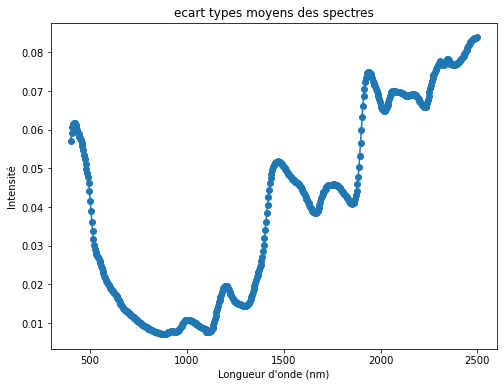

In [16]:
#spectres moyens en fonction des longueurs d'ondes
plt.figure(figsize=(8, 6))
plt.plot( np.array(ecarttypes_spectres.index, dtype=float), ecarttypes_spectres.values, marker='o', linestyle='-')
plt.xlabel('Longueur d\'onde (nm)')
plt.ylabel('Intensité')
plt.title('ecart types moyens des spectres')
plt.show()

On a pas de différence majeures au niveau du signal hors mi l'intensité qui diffère

### 2-2  Dessinez le corrélogramme entre les spectres et la teneur en prot ́eines. Que peut-on en conclure ?
 
 cela revient a calculer la corrélation entre chaque colonne du df et la matrice colonne contenant les teneur par la suite calculer representer sees corelation en fonction des longueurs d'ondes 
 - calcul des corelation matrice teneur proteines et chaque colonne 
 - recupération des valeurs
 - representation des valeurs de corelations en fonction des longueurs d'ondes 


In [33]:
# création d'un dataframe contenant toute les colonnes spectrales et aussi teneur 

spectres_uni = pd.concat([infos_farines,spectres_farines], axis = 1)
spectres_uni.columns

Index(['code', 'PROTREF', 'dur/tendre', 'code', '400', '404', '408', '412',
       '416', '420',
       ...
       '2460', '2464', '2468', '2472', '2476', '2480', '2484', '2488', '2492',
       '2496'],
      dtype='object', length=529)

In [82]:
colonnes_a_comparer =list(spectres_uni.columns)
colonnes_a_comparer = np.delete(colonnes_a_comparer,[0,2,3])
colonnes_a_comparer
corr= spectres_uni[colonnes_a_comparer].corr()
corr = corr.loc['PROTREF']
corr = corr.drop("PROTREF",axis=0) # suppression de Protref
corr


400     0.715649
404     0.718239
408     0.721641
412     0.723582
416     0.724314
          ...   
2480    0.636195
2484    0.635169
2488    0.634579
2492    0.634230
2496    0.634244
Name: PROTREF, Length: 525, dtype: float64

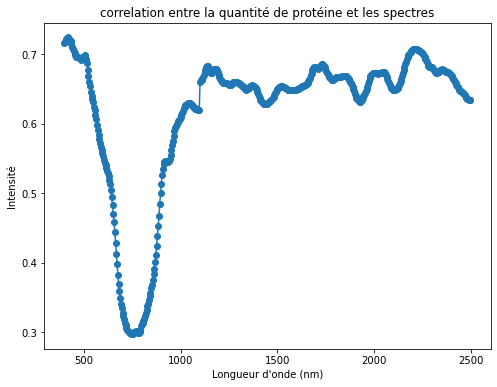

In [83]:
#spectres moyens en fonction des longueurs d'ondes
plt.figure(figsize=(8, 6))
plt.plot( np.array(corr.index, dtype=float), corr.values, marker='o', linestyle='-')
plt.xlabel('Longueur d\'onde (nm)')
plt.ylabel('Intensité')
plt.title('correlation entre la quantité de protéine et les spectres')
plt.show()

### 2-2 Construire l’histogramme de la variable « protéines » en représentant l’appartenance des  échantillons à leur classe. Que peut-on en conclure ?

Text(0.5, 1.0, "representation de l'histogramme de la variable protéine en repesentant l'appartenance des echantillons à leur classe")

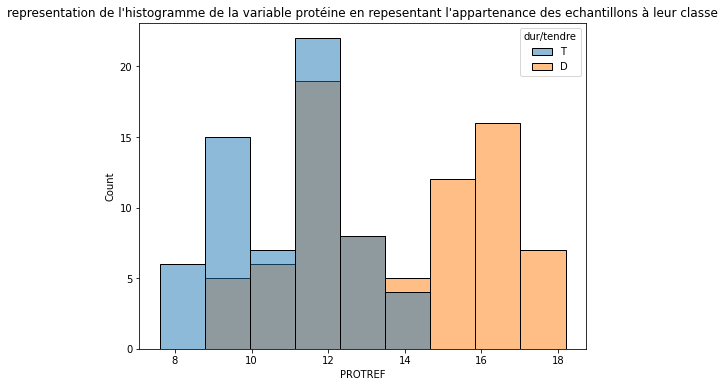

In [93]:
# representation de l'histogramme de la variable protéine en repesentant l'appartenance des echantillons à leur classe
plt.figure(figsize=(8, 6))
sns.histplot(infos_farines,x='PROTREF',hue='dur/tendre')
plt.title("representation de l'histogramme de la variable protéine en repesentant l'appartenance des echantillons à leur classe")

### Conclusion 
Il y un lien entre la variable dur/tendre et la variable PROTREF. Lorsque que la quantité de protéine dans le blé est faible le blé est dit tendre tandis que lorsque le blé a une quantité élévé de protéine le blé est dit dur.
explication : https://fr.wikipedia.org/wiki/Blé_dur

### 2-4 Construire de la même manière l’histogramme de la longueur d’onde 2000 nanomètres. La figure finale devrait comporter dans les 10 - 20 classes. Que peut-on en conclure ?

Text(0.5, 1.0, 'representation de  l’histogramme de la longueur d’onde 2000 nanomètres')

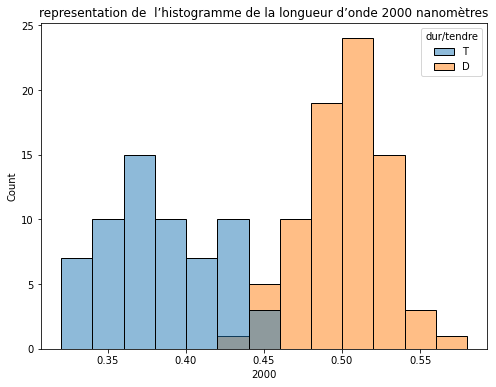

In [96]:
plt.figure(figsize=(8, 6))
sns.histplot(spectres_uni,x='2000',hue='dur/tendre',binwidth=0.02)
plt.title("representation de  l’histogramme de la longueur d’onde 2000 nanomètres")

#### conclusion 
l’histogramme de la longueur d’onde 2000 nanomètres montre qu'il y a une différence entre les blé dur et tendre 
Les blés dur on une absorbance plus élévé que les blés tendre à la longueur d'onde 2000

- Explication physique : Les blés sont broyés par une méthode de broyage standardisée.
Les blés tendres à l'issue de ce broyage produisent de la farine de granulométrie plus fine tandis que les blés dur produisent de la farine de granulométrie plus élévées.
La granulométrie a un impact direct en spectroscopie proche infrarouge cela se traduit par une intensité plus élévée pour une granulométrie élévé